In [196]:
import pandas as pd

import plotly.graph_objects as go

import plotly.express as px

import plotly.figure_factory as ff

import os

In [197]:
file_path=r'D:\JupyterCode\MyQuantFinProject\Data\RangeCrypto\ETH_050622_20Past_25-10Range.csv'

In [198]:
range_df=pd.read_csv(file_path,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
range_df.info()
range_df.drop(columns='Ticker',inplace=True)

list_cols=list(range_df.columns)


#Cut only interval looking
fromDate='2022-01-25';
toDate='2022-12';

if fromDate!='' and toDate!='':
 df=range_df[fromDate:toDate]
else:
 df=range_df


df.head(10)
#df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2022-05-17 to 2022-06-05
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        20 non-null     object 
 1   _XHH10        20 non-null     float64
 2   _XLL10        20 non-null     float64
 3   _XMid10       20 non-null     float64
 4   Range10       20 non-null     float64
 5   _PctX_HL10    20 non-null     float64
 6   _PctX_LH10    20 non-null     float64
 7   _PctMidToH10  20 non-null     float64
 8   _PctMidToL10  20 non-null     float64
 9   _XHH25        20 non-null     float64
 10  _XLL25        20 non-null     float64
 11  _XMid25       20 non-null     float64
 12  Range25       20 non-null     float64
 13  _PctX_HL25    20 non-null     float64
 14  _PctX_LH25    20 non-null     float64
 15  _PctMidToH25  20 non-null     float64
 16  _PctMidToL25  20 non-null     float64
dtypes: float64(16), object(1)
memory usage: 2.8+ KB
['_XHH1

,_XHH10,_XLL10,_XMid10,Range10,_PctX_HL10,_PctX_LH10,_PctMidToH10,_PctMidToL10,_XHH25,_XLL25,_XMid25,Range25,_PctX_HL25,_PctX_LH25,_PctMidToH25,_PctMidToL25
Date/Time,,,,,,,,,,,,,,,,
2022-05-17,2635.34,1960.22,2297.78,675.12,-25.62,34.44,14.69,-14.69,3006.62,1960.22,2483.42,1046.40,-34.80,53.38,21.07,-21.07
2022-05-18,2519.71,1960.22,2239.96,559.49,-22.20,28.54,12.49,-12.49,3006.62,1960.22,2483.42,1046.40,-34.80,53.38,21.07,-21.07
2022-05-19,2342.05,1915.11,2128.58,426.94,-18.23,22.29,10.03,-10.03,3006.62,1915.11,2460.86,1091.51,-36.30,56.99,22.18,-22.18
2022-05-20,2342.05,1915.11,2128.58,426.94,-18.23,22.29,10.03,-10.03,3006.62,1915.11,2460.86,1091.51,-36.30,56.99,22.18,-22.18
2022-05-21,2145.29,1915.11,2030.20,230.18,-10.73,12.02,5.67,-5.67,2940.64,1915.11,2427.88,1025.53,-34.87,53.55,21.12,-21.12
2022-05-22,2145.29,1915.11,2030.20,230.18,-10.73,12.02,5.67,-5.67,2940.64,1915.11,2427.88,1025.53,-34.87,53.55,21.12,-21.12
2022-05-23,2145.29,1915.11,2030.20,230.18,-10.73,12.02,5.67,-5.67,2940.64,1915.11,2427.88,1025.53,-34.87,53.55,21.12,-21.12
2022-05-24,2145.29,1915.11,2030.20,230.18,-10.73,12.02,5.67,-5.67,2940.64,1915.11,2427.88,1025.53,-34.87,53.55,21.12,-21.12
2022-05-25,2145.29,1915.11,2030.20,230.18,-10.73,12.02,5.67,-5.67,2940.64,1915.11,2427.88,1025.53,-34.87,53.55,21.12,-21.12


# Plot scatter to view relation between difference range

In [211]:

#https://plotly.com/python/figure-factory-table/
def plot_dynamic_scatter(listColsToPlot,dfTable,title,y_title):
    #fig=go.Figure()
    fig =  ff.create_table(dfTable,height_constant=60) 
    
    for col_name in listColsToPlot:
     fig.add_trace (
        go.Scatter(x=df.index, y=df[col_name],
                   name=col_name,opacity=0.8,
                   xaxis='x2', yaxis='y2')
     )
    fig.update_layout(
    title_text = title,
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title':y_title}
    )
      
    return fig
def  manage_chart(dfx,colsToPlot,title,y_title):
    print(colsToPlot)
    dfTable=(dfx[colsToPlot]).reset_index()
    dfTable['Date/Time']=dfTable['Date/Time'].dt.strftime('%d-%b-%Y')
    dfTable=dfTable.rename(columns={'Date/Time':'Date'})
    #print(dfTable.info())
    fig_hml=None
    if len(colsToPlot)>0:
      fig_hml=plot_dynamic_scatter(colsToPlot,dfTable,title,y_title)
    return fig_hml

In [214]:
print(list_cols)

['_XHH10', '_XLL10', '_XMid10', 'Range10', '_PctX_HL10', '_PctX_LH10', '_PctMidToH10', '_PctMidToL10', '_XHH25', '_XLL25', '_XMid25', 'Range25', '_PctX_HL25', '_PctX_LH25', '_PctMidToH25', '_PctMidToL25']


['_PctMidToL10', '_PctMidToL25']


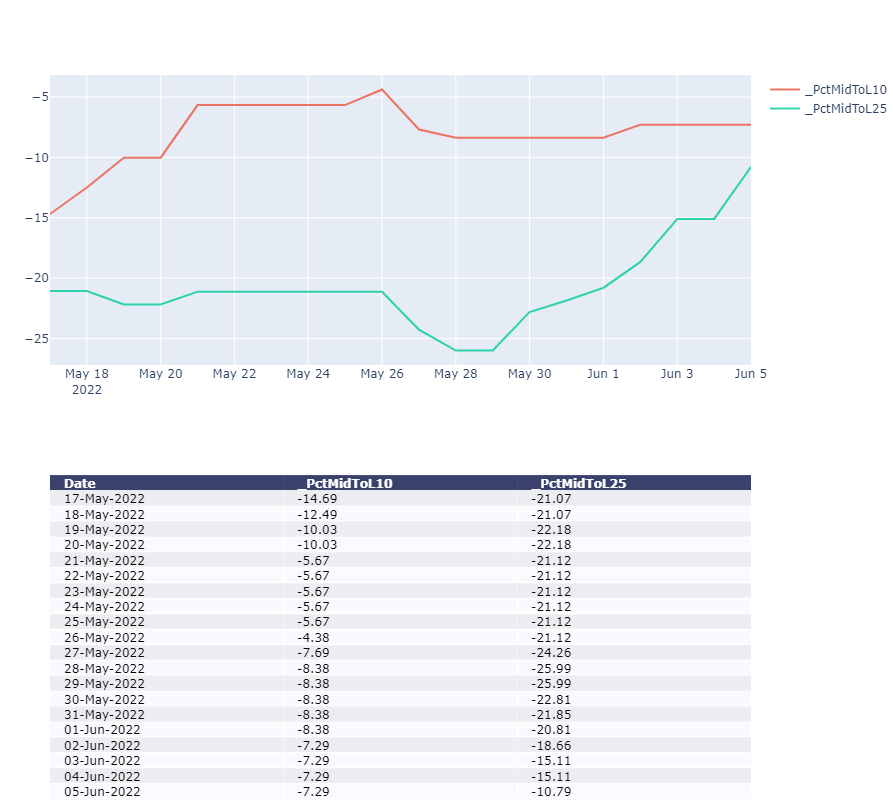

In [218]:
colsToPlot=[  x for  x  in list_cols if x.startswith('_PctMidToL') ]
#colsToPlot=[ ]
fig=manage_chart(df,colsToPlot,"",'')
fig

In [219]:
df_HL=

Index(['_XHH10', '_XLL10', '_XMid10', 'Range10', '_PctX_HL10', '_PctX_LH10',
       '_PctMidToH10', '_PctMidToL10', '_XHH25', '_XLL25', '_XMid25',
       'Range25', '_PctX_HL25', '_PctX_LH25', '_PctMidToH25', '_PctMidToL25'],
      dtype='object')

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig=make_subplots(rows=3,cols=2,)

fig.add_trace(go.Histogram(x=df['Pct_LtH15'],name="HL15") ,row=1,col=1)
fig.add_trace(go.Histogram(x=df['Pct_LtH30'],name="HL30") ,row=1,col=2)

fig.add_trace(go.Histogram(x=df['Pct_Mid_To_H15'],name="Pct_Mid_To_H15") ,row=2,col=1)
fig.add_trace(go.Histogram(x=df['Pct_Mid_To_H30'],name="Pct_Mid_To_H30") ,row=2,col=2)

fig.add_trace(go.Histogram(x=df['Pct_Mid_To_L15'],name="Pct_Mid_To_L15") ,row=3,col=1)
fig.add_trace(go.Histogram(x=df['Pct_Mid_To_L30'],name="Pct_Mid_To_L30") ,row=3,col=2)


fig.update_layout(
autosize=True,width=1000,height=1000,
  paper_bgcolor="LightSteelBlue",legend_orientation="h"

)

fig.show()